<div class="alert alert-info">
    <h1>Voyager Phase Curve</h1>
Robert S. French, rfrench@seti.org - Last updated April 28, 2023
</div>

In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import mplcursors
import numpy as np
import pandas as pd
import sys
if '..' not in sys.path: sys.path.append('..')
    
from f_ring_util.f_ring import (add_hover,
                                compute_corrected_ew, 
                                fit_hg_phase_function, 
                                hg_func,
                                limit_by_quant,
                                print_hg_params,
                                read_cassini_ew_stats,
                                read_voyager_ew_stats,
                                scale_hg_phase_function)

%matplotlib notebook

# Utility Functions

In [2]:
### SINGLE PLOTS ON AN AXIS - PHASE CURVE

def plot_points_cassini_voyager(c_obsdata, v1_obsdata, v2_obsdata, params,
                                title=None, col='Normal EW Mean', ax=None, **kwargs):
    """Plot scattered EW points for Cassini, V1, and V2."""
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 5))

    ax.scatter(c_obsdata['Mean Phase'], c_obsdata[col], marker='o', 
               s=5, color='black', alpha=0.3, label='Cassini')
    p = ax.scatter(v1_obsdata['Mean Phase'], v1_obsdata[col], marker='^', 
                   s=5, color='green', alpha=1, label='V1')
    add_hover(v1_obsdata, p)
    p = ax.scatter(v2_obsdata['Mean Phase'], v2_obsdata[col], marker='^', 
                   s=5, color='red', alpha=1, label='V2')
    add_hover(v2_obsdata, p)
    if params is not None:
        scale_c = scale_hg_phase_function(params, c_obsdata)
        scale_v1 = scale_hg_phase_function(params, v1_obsdata)
        scale_v2 = scale_hg_phase_function(params, v2_obsdata)
        xrange = np.arange(c_obsdata['Mean Phase'].min(), c_obsdata['Mean Phase'].max()+1)
        phase_model = hg_func(params, xrange)
        ax.plot(xrange, phase_model*scale_c, '-', color='grey', lw=2)
        ax.plot(xrange, phase_model*scale_v1, '-', color='green', lw=2)
        ax.plot(xrange, phase_model*scale_v2, '-', color='red', lw=2)
        print(f'Cassini / Voyager 1: {scale_c/scale_v1:.3f}')
        print(f'Cassini / Voyager 2: {scale_c/scale_v2:.3f}')
    ax.legend()
    ax.set_yscale('log')
    ax.set_xlim(0, 180)
    ax.set_xlabel('Phase Angle (°)')
    ax.set_ylabel(col)
    if title is not None:
        plt.title(title)

In [3]:
obsdata_60_0 = read_cassini_ew_stats('../data_files/cass_ew_60_0.csv')
print()
obsdata_0_1 = read_cassini_ew_stats('../data_files/cass_ew_0_1.csv')
obsdata_0_1_mean = obsdata_0_1.groupby('Observation').mean(numeric_only=True)

** SUMMARY STATISTICS - ../data_files/cass_ew_60_0.csv **
Unique observation names: 155
Total slices: 155
Starting date: 2004-06-20 19:15:28
Ending date: 2017-09-06 11:47:07
Time span: 4825 days 16:31:39

** SUMMARY STATISTICS - ../data_files/cass_ew_0_1.csv **
Unique observation names: 210
Total slices: 38467
Starting date: 2004-06-20 19:15:28
Ending date: 2017-09-07 21:51:55
Time span: 4827 days 02:36:27


# Compare Cassini and Voyager

In [4]:
v1_obsdata_0_1 = read_voyager_ew_stats('../data_files/v1_ew_0_1.csv')
print()
v2_obsdata_0_1 = read_voyager_ew_stats('../data_files/v2_ew_0_1.csv')
v1_obsdata_0_1_mean = v1_obsdata_0_1.groupby('Observation').mean(numeric_only=True)
v2_obsdata_0_1_mean = v2_obsdata_0_1.groupby('Observation').mean(numeric_only=True)

** SUMMARY STATISTICS - ../data_files/v1_ew_0_1.csv **
Unique observation names: 17
Total slices: 837
Starting date: 1980-11-08 01:13:49
Ending date: 1980-11-17 05:04:13
Time span: 9 days 03:50:24

** SUMMARY STATISTICS - ../data_files/v2_ew_0_1.csv **
Unique observation names: 18
Total slices: 529
Starting date: 1981-08-19 03:36:44
Ending date: 1981-08-29 13:08:28
Time span: 10 days 09:31:44


<IPython.core.display.Javascript object>


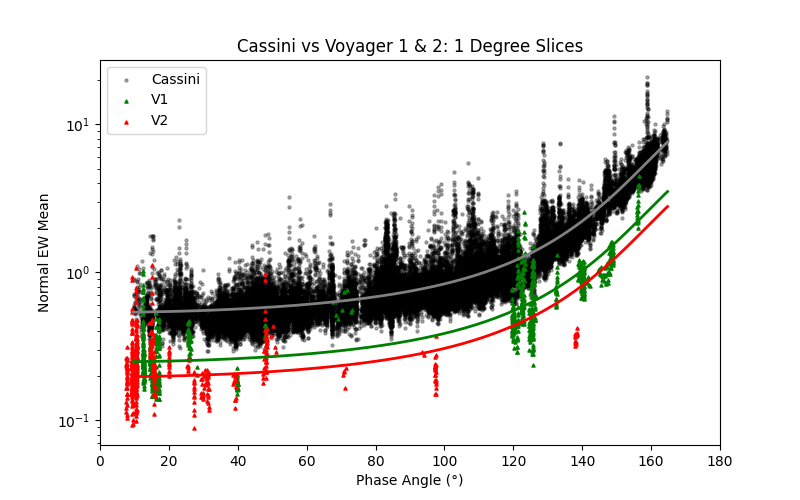

Cassini / Voyager 1: 2.162
Cassini / Voyager 2: 2.729


In [5]:
cutoff = 100
obsdata_limited = limit_by_quant(obsdata_60_0, cutoff, None)
params_master, _, _ = fit_hg_phase_function(2, None, obsdata_limited)
plot_points_cassini_voyager(obsdata_0_1, v1_obsdata_0_1, v2_obsdata_0_1, params_master,
                            title='Cassini vs Voyager 1 & 2: 1 Degree Slices')

<IPython.core.display.Javascript object>


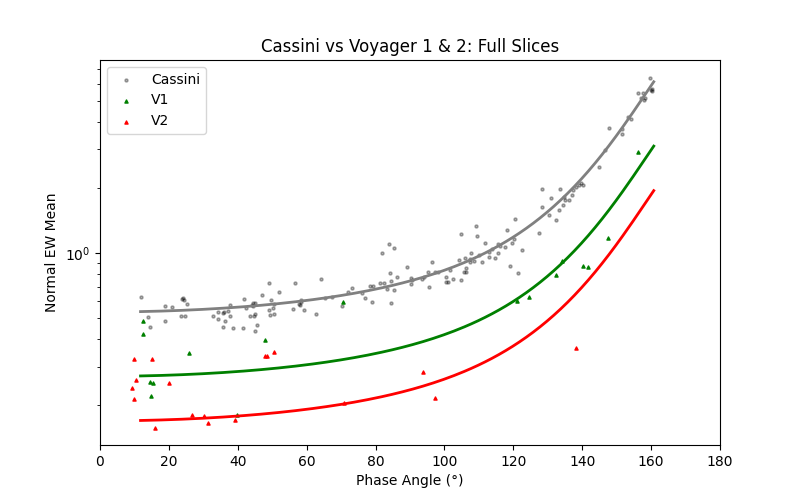

Cassini / Voyager 1: 1.977
Cassini / Voyager 2: 3.169


In [6]:
plot_points_cassini_voyager(obsdata_60_0, v1_obsdata_0_1_mean, v2_obsdata_0_1_mean, params_master,
                            title='Cassini vs Voyager 1 & 2: Full Slices')